In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
class votePop:
    
    def __init__(self,n=1000,center=None,cov=None):
        self.N = n
        if center is None:
            self.center = [0,0]
        else:
            self.center = center

        if cov is None:
            self.cov = [[1000,0],[0,1000]]
        else:
            self.cov = cov

        self.voters = np.random.multivariate_normal(self.center,self.cov,self.N)
        
    def show(self):
        x,y = self.voters.T
        plt.plot(x,y,'x')
        plt.axis('equal')
        plt.show()


In [63]:
class candidate:
    
    def __init__(self,pos=None):
        if pos is None:
            self.pos = np.array([0,0])
        else:
            self.pos = np.array(pos)
        self.votes = None
        
    def __str__(self):
        return str(self.pos)

In [64]:
def election(population, candidates, method=None):
    if method is None:
        method = 'plurality'
    
    positions = np.array([candidates[k].pos for k in candidates])
    voters = population.voters
    
    #zero out votes
    for c in candidates.values():
        c.votes=0

    
    if method is 'IRV' or 'plurality': #Euclidian Voting
        for voter in voters:
            distances = np.linalg.norm(positions - voter, axis=-1) #along rows
            candidates[np.argmin(distances)].votes += 1
            winner = np.argmax([candidates[k].votes for k in candidates])
            
        if method is 'IRV':
#             for k, v in candidates.items():
#                 print(k, v)
            if candidates[winner].votes < (population.N / 2): #not majority
                loser = np.argmin([candidates[k].votes for k in candidates])
                nextRound = dict()
                i = 0;
                for k in candidates: 
                    if k is not loser: #left shift
                        nextRound[i] = candidates[k]
                        i += 1
                        
                winner = election(population, nextRound, method='IRV')
            
            
    return candidates[winner]

In [179]:
class electionSweep():
    def __init__(self, candidates, size=None, xres=25, yres=None , n=1000): #TODO:refactor with kwargs later
        if size is None:
            size = [[-1000,1000],[-1000,1000]]
        [[self.xmin,self.xmax],[self.ymin,self.ymax]] = size
        
        self.xres = xres
        if yres is None:
            self.yres = self.xres
        
        self.N = n
        self.C = candidates
        self.Cinv = {v: k for k, v in self.C.items()} #TODO:Fix ugly

        self.xs = np.linspace(self.xmin, self.xmax, num=self.xres)
        self.ys = np.linspace(self.ymin, self.ymax, num=self.yres)
        self.res = np.zeros((self.xres, self.yres))
        
    def run(self, style=None):
        for x in range(self.xres):
            for y in range(self.yres):
                pop = votePop(self.N,center=[self.xs[x],self.ys[y]])
                self.res[self.xres-x-1,y] = self.Cinv[election(pop, self.C, method=style)] #Array filling vs image indexing
    
    def show(self):
        pos = np.array([self.C[k].pos for k in self.C])
        pos = pos[pos[:,0].argsort()]
        cxs, cys = pos.T
        plt.imshow(self.res, interpolation='none', cmap='Reds', extent=[self.xmin,self.xmax,self.ymin,self.ymax])
        plt.scatter(cxs,cys, c=sorted(self.C.keys()), cmap='Reds')
        plt.grid(False)

In [206]:
c1= {0:candidate([-100,-600]),1:candidate([-400,-0]),2:candidate([200,-50]),3:candidate([400,50])}
a = electionSweep(c1,xres=100)

In [207]:
a.run()

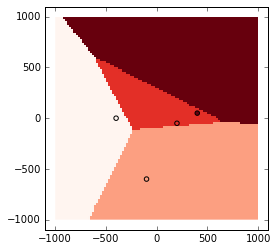

In [208]:
a.show()

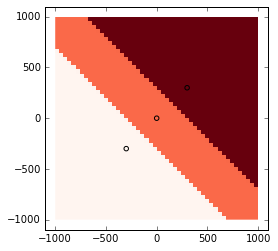

In [198]:
c1= {1:candidate([0,0]),2:candidate([300,300]),0:candidate([-300,-300])}
a = electionSweep(c1,xres=50)
a.run()
a.show()

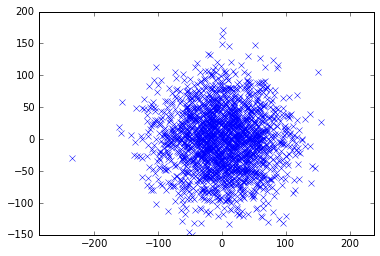

In [10]:
c1 = candidate()
c2 = candidate([1,1])
pop = votePop(n=2000,center=[0,0])
pop.show()